<a href="https://colab.research.google.com/github/enrique-carbo/Data-Science/blob/main/Seccion12_K_Vecinnos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K Vecinos mas cercanos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/enrique-carbo/data/main/vehiculos.csv')

In [ ]:
dataframe.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus
5,107.0,57.0,106.0,172.0,50.0,6.0,255.0,26.0,28.0,169.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183.0,bus
6,97.0,43.0,73.0,173.0,65.0,6.0,153.0,42.0,19.0,143.0,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204.0,bus
7,90.0,43.0,66.0,157.0,65.0,9.0,137.0,48.0,18.0,146.0,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202.0,van
8,86.0,34.0,62.0,140.0,61.0,7.0,122.0,54.0,17.0,127.0,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208.0,van
9,93.0,44.0,98.0,197.0,62.0,11.0,183.0,36.0,22.0,146.0,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204.0,saab


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   compactness                 846 non-null    float64
 1   circularity                 846 non-null    float64
 2   distance_circularity        846 non-null    float64
 3   radius_ratio                846 non-null    float64
 4   pr_axis_aspect_ratio        846 non-null    float64
 5   max_length_aspect_ratio     846 non-null    float64
 6   scatter_ratio               846 non-null    float64
 7   elongatedness               846 non-null    float64
 8   pr_axis_rectangularity      846 non-null    float64
 9   max_length_rectangularity   846 non-null    float64
 10  scaled_variance_major_axis  846 non-null    float64
 11  scaled_variance_minor_axis  846 non-null    float64
 12  scaled_radius_gyration      846 non-null    float64
 13  skewness_major_axis         846 non

In [ ]:
dataframe.shape

(846, 19)

In [ ]:
dataframe['vehicle_class'].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

### Variables 
y = variable objetivo a predecir (tipo de vehiculo)  
X = resto del dataframe

In [ ]:
y = dataframe['vehicle_class']
X = dataframe.drop('vehicle_class', axis=1)

In [ ]:
X.shape, y.shape

((846, 18), (846,))

#### Dividimos el dataframe en un conjunto de entrenamiento y otro de pruebas.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

### Entrenamiento y Predicciones del Modelo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
predicciones = knn.predict(X_test)


In [ ]:
predicciones

array(['saab', 'opel', 'saab', 'opel', 'saab', 'van', 'saab', 'opel',
       'saab', 'van', 'opel', 'bus', 'van', 'opel', 'opel', 'van', 'opel',
       'saab', 'bus', 'saab', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus',
       'opel', 'saab', 'van', 'bus', 'opel', 'opel', 'bus', 'saab',
       'opel', 'bus', 'van', 'bus', 'bus', 'van', 'van', 'opel', 'opel',
       'bus', 'saab', 'van', 'bus', 'bus', 'opel', 'bus', 'bus', 'saab',
       'opel', 'van', 'bus', 'saab', 'saab', 'bus', 'saab', 'opel', 'van',
       'van', 'bus', 'bus', 'saab', 'van', 'bus', 'bus', 'van', 'saab',
       'van', 'bus', 'opel', 'van', 'opel', 'van', 'saab', 'saab', 'bus',
       'bus', 'van', 'saab', 'saab', 'van', 'bus', 'bus', 'saab', 'saab',
       'saab', 'van', 'van', 'van', 'van', 'saab', 'saab', 'saab', 'saab',
       'opel', 'opel', 'saab', 'bus', 'bus', 'bus', 'saab', 'van', 'bus',
       'saab', 'saab', 'saab', 'bus', 'van', 'bus', 'opel', 'bus', 'saab',
       'saab', 'opel', 'van', 'opel', 'opel', 'bus

### Métodos de evaluación 
**Matriz de confusión**  
**Precisión del modelo**


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicciones))


[[65  0  7  5]
 [ 7 24 28  6]
 [ 5 26 23  3]
 [ 2  0  2 51]]


In [ ]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         bus       0.82      0.84      0.83        77
        opel       0.48      0.37      0.42        65
        saab       0.38      0.40      0.39        57
         van       0.78      0.93      0.85        55

    accuracy                           0.64       254
   macro avg       0.62      0.64      0.62       254
weighted avg       0.63      0.64      0.63       254



In [ ]:
tasa_error = []
for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  prediccion_i = knn.predict(X_test)
  tasa_error.append(np.mean(prediccion_i != y_test))

In [ ]:
tasa_error

[0.35826771653543305,
 0.3464566929133858,
 0.3188976377952756,
 0.3228346456692913,
 0.33858267716535434,
 0.3346456692913386,
 0.3228346456692913,
 0.33858267716535434,
 0.36220472440944884,
 0.3661417322834646,
 0.35039370078740156,
 0.3661417322834646,
 0.36220472440944884,
 0.38188976377952755,
 0.35039370078740156,
 0.3661417322834646,
 0.3661417322834646,
 0.3700787401574803,
 0.3661417322834646,
 0.3779527559055118,
 0.3661417322834646,
 0.37401574803149606,
 0.37401574803149606,
 0.37401574803149606,
 0.3779527559055118,
 0.38976377952755903,
 0.38188976377952755,
 0.3700787401574803,
 0.37401574803149606]

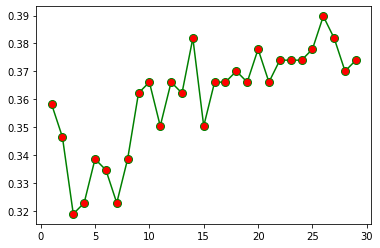

In [ ]:
valores = range(1, 30)
plt.plot(valores, tasa_error, color='green', marker='o', markerfacecolor='red', markersize=8)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predicciones = knn.predict(X_test)


In [ ]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         bus       0.77      0.88      0.82        77
        opel       0.58      0.45      0.50        65
        saab       0.44      0.39      0.41        57
         van       0.82      0.98      0.89        55

    accuracy                           0.68       254
   macro avg       0.65      0.67      0.66       254
weighted avg       0.66      0.68      0.66       254

